In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Just essential tools

In [2]:
df = pd.read_pickle('data/KAS_USDT_5m_300_days_data.pkl')
df_1 = pd.read_pickle('data/KAS_USDT_1m_10_days_data.pkl')

df.head(3)
# df is a 5-minute dataframe, where each row is a 5-minute candle
# Same applies to df_1, but it's recent data and shorter

,open,close,high,low,volume
timestamp,,,,,
2024-01-05 11:55:00,0.112729,0.113025,0.113134,0.112401,67258.53
2024-01-05 12:00:00,0.113025,0.113068,0.113529,0.11283,132406.52
2024-01-05 12:05:00,0.113068,0.1119,0.113068,0.111899,196303.66


In [3]:
print(len(df))
df.info()
# As we can see, df is very good as it doesn't contain any null values, this is because
# df is got throug API of exchange MEXC, and it would be worst nightmare for an exchange to 
# have any undefined values in their data.

# Also keep in mind that crypto exhanges work 24/7 without holidays or breaks, so data
# doesn't have any gaps

# Unfortunately when data is fetched, all values are converted into objects, whily they clearly are
# intended to be floats 

17300
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17300 entries, 2024-01-05 11:55:00 to 2024-10-30 10:50:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   open    17300 non-null  object
 1   close   17300 non-null  object
 2   high    17300 non-null  object
 3   low     17300 non-null  object
 4   volume  17300 non-null  object
dtypes: object(5)
memory usage: 810.9+ KB


In [4]:
df = df.astype({'high': float, 'low': float, 'open': float, "close": float, 'volume': float})
df.describe()

# Now after type conversion (which could be done at the moment of import) we can get basic 
# understanding of our dataframe. 

,open,close,high,low,volume
count,17300.000000,17300.000000,17300.000000,17300.000000,1.730000e+04
mean,0.145492,0.145493,0.145756,0.145181,2.233928e+05
std,0.024698,0.024696,0.024725,0.024665,3.470606e+05
min,0.095761,0.095761,0.096825,0.095600,0.000000e+00
25%,0.125451,0.125451,0.125698,0.125103,5.144840e+04
50%,0.146234,0.146241,0.146537,0.146000,1.168319e+05
75%,0.166471,0.166478,0.166714,0.166200,2.511642e+05
max,0.207599,0.207599,0.207914,0.207046,6.126775e+06


NameError: name 'stats' is not defined

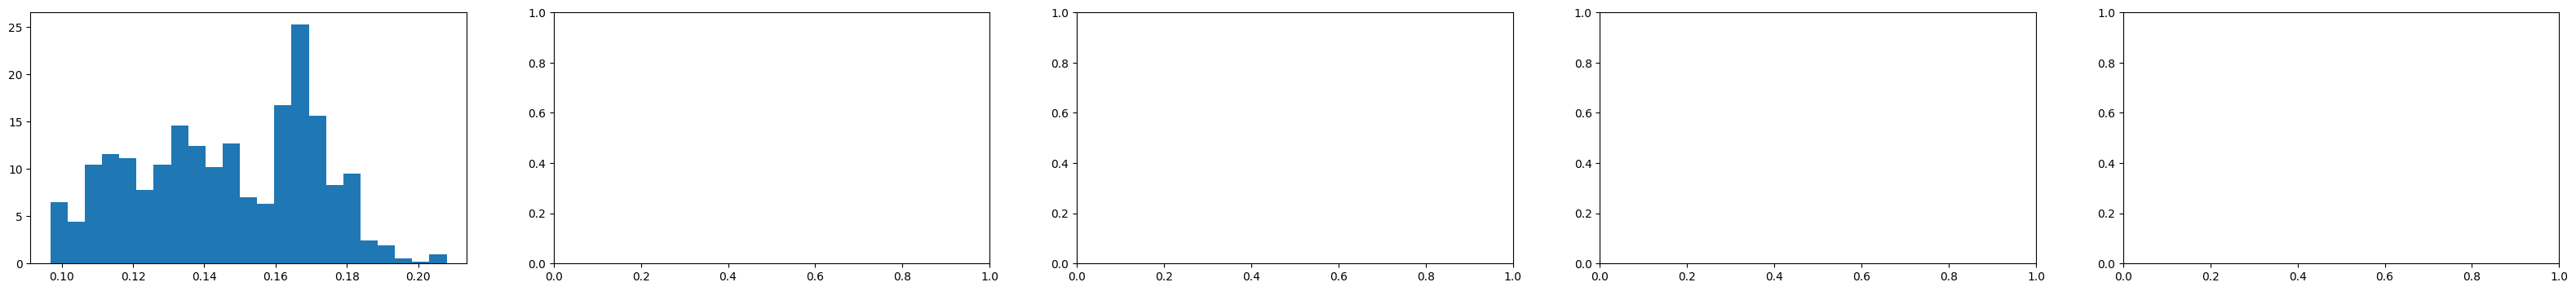

In [5]:
keys = ['high', 'low', 'open', 'close', 'volume']
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=23)
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)